<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 90px">

# A/B Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# Read data
soap = pd.read_csv("data/soap.csv")
soap

,cube,level,pre,post
0,1,1,13.14,13.44
1,2,1,13.17,13.27
2,3,1,13.17,13.31
3,4,1,13.17,12.77
4,5,2,13.03,10.40
5,6,2,13.18,10.57
6,7,2,13.12,10.71
7,8,2,13.19,10.04
8,9,3,13.14,11.28
9,10,3,13.19,11.16


In [3]:
# Calculate weight loss
soap["wloss"] = soap["pre"] - soap["post"]
soap

,cube,level,pre,post,wloss
0,1,1,13.14,13.44,-0.30
1,2,1,13.17,13.27,-0.10
2,3,1,13.17,13.31,-0.14
3,4,1,13.17,12.77,0.40
4,5,2,13.03,10.40,2.63
5,6,2,13.18,10.57,2.61
6,7,2,13.12,10.71,2.41
7,8,2,13.19,10.04,3.15
8,9,3,13.14,11.28,1.86
9,10,3,13.19,11.16,2.03


In [4]:
# Some EDA
soap.groupby("level")["wloss"].mean()

level
1   -0.0350
2    2.7000
3    1.9925
Name: wloss, dtype: float64

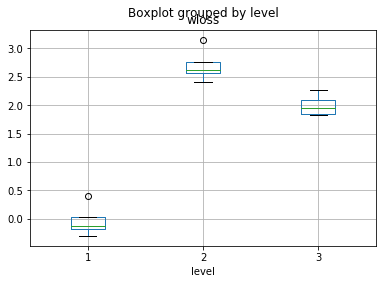

In [5]:
soap.boxplot(column="wloss", by="level");

## ANOVA Test of Soap Weight Loss
What are our hypotheses?

$$
H_0: \mu_1 = \mu_2 = \mu_3
$$

$$
H_A: \text{At least one } \mu_i \ne \mu_j \text{ for some } i \ne j
$$

In [6]:
# Mindless SciPy one-way ANOVA test
soap1 = soap.loc[soap['level'] == 1, "wloss"]
soap2 = soap.loc[soap['level'] == 2, "wloss"]
soap3 = soap.loc[soap['level'] == 3, "wloss"]
stats.f_oneway(soap1, soap2, soap3)

F_onewayResult(statistic=104.45124716553275, pvalue=5.914409422315586e-07)

In [7]:
# Imports from statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [8]:
# statsmodels follows the R pattern of using "formulas" to specify a model
# In order to specify a variable is categorical, use the C() function.
model = ols("wloss ~ C(level)", soap).fit()

In [9]:
# Can summarize this just like other statsmodels models
model.summary()

/home/tim/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wloss   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     104.5
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           5.91e-07
Time:                        14:31:14   Log-Likelihood:               0.068908
No. Observations:                  12   AIC:                             5.862
Df Residuals:                       9   BIC:                             7.317
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0350      0.139     -0.252      0.807      -0.349       0.279
C(level)[T.2]     2.7350      0.196     13.923      0.000       2.291       3.179
C(level)[T.3]     2.0275      0.196     10.321      0.000       1.583       2.472
==============================================================================
Omnibus:                        2.324   Durbin-Watson:                   2.578
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.594
Skew:                           0.836   Prob(JB):                        0.451
Kurtosis:                       2.372   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Here's where the magic happens...
# Let's look at this and go back to the deck.
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(level),2.0,16.122050,8.061025,104.451247,5.914409e-07
Residual,9.0,0.694575,0.077175,NaN,NaN


## ANOVA Test of Reaction Times
This will be a complete two-way ANOVA

In [11]:
# Reaction time data
react = pd.read_csv("data/reaction.csv")
react

,cue,wait,reaction
0,1,1,0.204
1,1,1,0.170
2,1,1,0.181
3,1,2,0.167
4,1,2,0.182
5,1,2,0.187
6,1,3,0.202
7,1,3,0.198
8,1,3,0.236
9,2,1,0.257


In [12]:
# statsmodels formula
# The * operator in formulae means "both main effects and interaction terms"
fml = "reaction ~ C(cue)*C(wait)"

# Fit model
model = ols(fml, react).fit()

In [13]:
# Again - we can see the summary
model.summary()

/home/tim/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               reaction   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     17.66
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           3.66e-05
Time:                        14:31:14   Log-Likelihood:                 51.440
No. Observations:                  18   AIC:                            -90.88
Df Residuals:                      12   BIC:                            -85.54
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1850      0.010     18.838      0.000       0.164       0.206
C(cue)[T.2]                  0.0833      0.014      6.000      0.000       0.053       0.114
C(wait)[T.2]                -0.0063      0.014     -0.456      0.657      -0.037       0.024
C(wait)[T.3]                 0.0270      0.014      1.944      0.076      -0.003       0.057
C(cue)[T.2]:C(wait)[T.2]    -0.0027      0.020     -0.136      0.894      -0.045       0.040
C(cue)[T.2]:C(wait)[T.3]    -0.0303      0.020     -1.544      0.148      -0.073       0.012
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   2.857
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.978
Skew:                           0.294   Prob(JB):                        0.613
Kurtosis:                       2.020   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# But the ANOVA table is the good stuff
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(cue),1.0,0.023544,0.023544,81.375000,0.000001
C(wait),2.0,0.001158,0.000579,2.001344,0.177799
C(cue):C(wait),2.0,0.000846,0.000423,1.462558,0.270135
Residual,12.0,0.003472,0.000289,NaN,NaN
